In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\AI & EC\W15\Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [3]:
df = pd.read_csv('D:\AI & EC\W15\Heart_Disease_Prediction.csv')
encoder = LabelEncoder()
encoder.fit(df['Heart Disease'])
labels = encoder.transform(df['Heart Disease'])
df['Heart Disease'] = labels
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<AxesSubplot:>

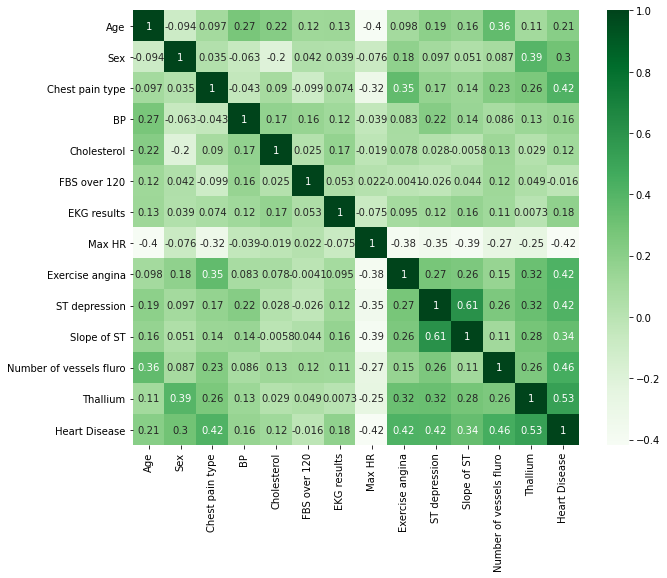

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [6]:
x=df.drop(['Age','Sex','BP','Cholesterol','FBS over 120','EKG results','Max HR','Slope of ST','Heart Disease'],axis=1)
y=df['Heart Disease']
x

,Chest pain type,Exercise angina,ST depression,Number of vessels fluro,Thallium
0,4,0,2.4,3,3
1,3,0,1.6,0,7
2,2,0,0.3,0,7
3,4,1,0.2,1,7
4,2,1,0.2,1,3
...,...,...,...,...,...
265,3,0,0.5,0,7
266,2,0,0.0,0,7
267,2,0,1.3,0,3
268,4,0,0.4,0,6


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [8]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
acc_1=accuracy_score(y_test,pred_1)
acc_1

0.7592592592592593

In [9]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
acc_2=accuracy_score(y_test,pred_2)
acc_2

0.8148148148148148

In [10]:
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(x_test)
    acc_3=accuracy_score(y_test,preds)
acc_3

0.7777777777777778

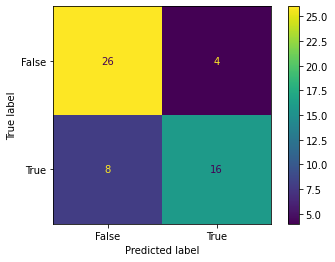

In [11]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [12]:
f1 = f1_score(y_test, preds)
print("F1 score:", f1)

F1 score: 0.7272727272727272


In [13]:
precision = precision_score(y_test, preds)
print("Precision:", precision)

Precision: 0.8


In [14]:
recall = recall_score(y_test, preds)
print("Recall: {:.2f}".format(recall))

Recall: 0.67


In [15]:
new_patient = [[4, 1, 0.2, 1, 7]]
prediction = knn.predict(new_patient)
if prediction[0]== 0:
    print("The patient does not have heart disease")
else:
    print("The patient has heart disease")

The patient has heart disease


In [16]:
svm = svm.SVC(max_iter=10000)
svm.fit(x_train, y_train)
pred_2 = svm.predict(x_test)
acc_4 = accuracy_score(y_test, pred_2)
acc_4

0.7407407407407407